<a href="https://colab.research.google.com/github/Mitsko/AILabs/blob/master/first_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import csv
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv("/content/drive/My Drive/InputData/Davis.csv")
msk = np.random.rand(len(df)) <= 0.5
train = df[msk]
test = df[~msk]
test.head()

,Unnamed: 0,sex,weight,height,repwt,repht
4,5,F,59,157,59.0,155.0
5,6,M,76,170,76.0,165.0
6,7,M,76,167,77.0,165.0
7,8,M,69,186,73.0,180.0
10,11,M,70,175,75.0,174.0


In [3]:
mask = []
for val in train.itertuples():
  index = val.weight / pow((val.height / 100),2)
  mask.append(index < 45 and index > 16)
train = train[mask]
mask.clear() 
for val in test.itertuples():
  index = val.weight / pow((val.height / 100),2)
  mask.append(index < 45 and index > 16)
test = test[mask]
test.itertuples
test.head()

,Unnamed: 0,sex,weight,height,repwt,repht
4,5,F,59,157,59.0,155.0
5,6,M,76,170,76.0,165.0
6,7,M,76,167,77.0,165.0
7,8,M,69,186,73.0,180.0
10,11,M,70,175,75.0,174.0


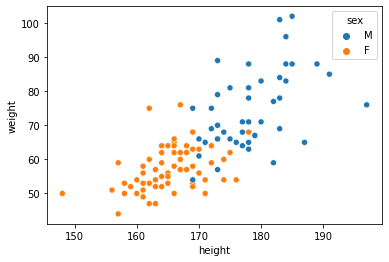

In [4]:
sns.scatterplot(x='height', y='weight', hue='sex', data=train)

In [5]:
male_train = train[train["sex"] == "M"]
female_train = train[train["sex"] == "F"]

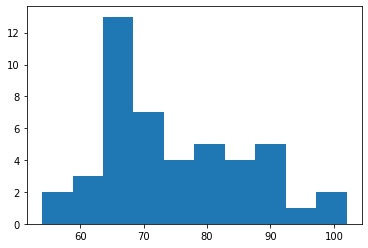

In [6]:
plt.hist(male_train.weight)
plt.show()

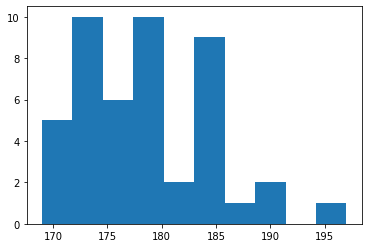

In [7]:
plt.hist(male_train.height)
plt.show()

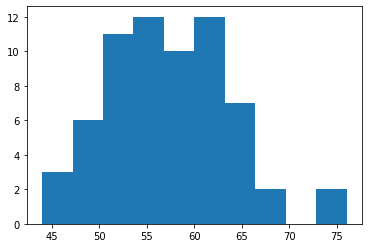

In [8]:
plt.hist(female_train.weight)
plt.show()

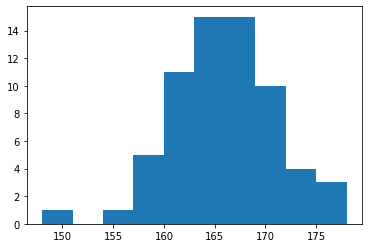

In [9]:
plt.hist(female_train.height)
plt.show()

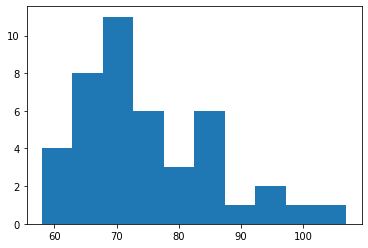

In [10]:
plt.hist(male_train.repwt)
plt.show()

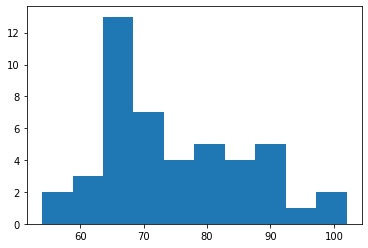

In [11]:
plt.hist(male_train.weight)
plt.show()

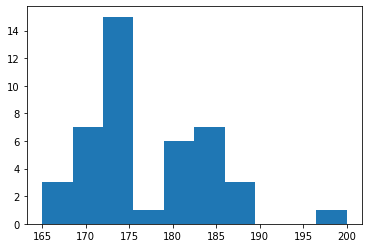

In [12]:
plt.hist(male_train.repht)
plt.show()

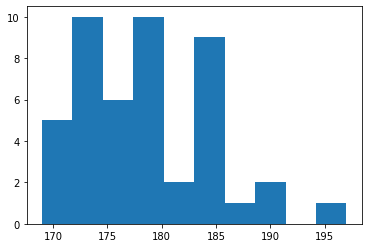

In [13]:
plt.hist(male_train.height)
plt.show()

In [35]:
import scipy.stats
class PointGenerator:
  def __init__(self):
    #Средние значения
    self.av_train={
      "M":None,
      "F":None
    }
    # Ковариационные матрицы распределения
    self.cov_train={
      "M":None,
      "F":None
    }
    self.p_male = None
  
  def fit(self,  x_train):
    self.x_train = x_train
    male_train = train[train["sex"] == "M"]
    female_train = train[train["sex"] == "F"]
    self.p_male = len(x_train[train["sex"] == "F"])/len(x_train)
    self.av_train["M"]=np.mean(male_train["height"]),np.mean(male_train["weight"])
    self.av_train["F"]=np.mean(female_train["height"]),np.mean(female_train["weight"]) 

    self.cov_train["M"] = np.cov(male_train["height"].to_numpy(),male_train["weight"].to_numpy())
    self.cov_train["F"] = np.cov(female_train["height"].to_numpy(),female_train["weight"].to_numpy())
  
  def generate_points(self, n_points):
    resHeight = []
    resWeight = []
    resSex = []
    for i in range (100):
      sex = self.generate_sex(self.p_male)
      height, weight = np.random.multivariate_normal([self.av_train[sex][0],self.av_train[sex][1]],self.cov_train[sex])
      resHeight.append((height))
      resWeight.append((weight))
      resSex.append((sex))
    result = {"sex":resSex,"height":resHeight,"weight":resWeight}
    davis_gen = pd.DataFrame(result)
    return davis_gen

  def generate_sex(self, pm):
    x=np.random.uniform(0,100)
    if x <= pm*100:
        sex = "M"
    else:
        sex = "F"
    return sex 
  
  def log_likelihood(self, X):
    sex = X["sex"]
    M = np.column_stack((X["height"], X["weight"]))
    return np.log(scipy.stats.multivariate_normal.pdf(M, self.av_train[sex], self.cov_train[sex]))
  
  def mean_log_likelihood(self,X):
    result = 0
    for index, row in X.iterrows():
      result += self.log_likelihood(row)
    return result/len(X)


-6.55515030738941
-6.517076392250724
-6.795230801174287


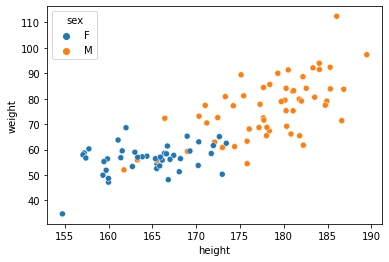

In [36]:
pGen = PointGenerator()
pGen.fit(train)
points = pGen.generate_points(len(train))
sns.scatterplot(x='height', y='weight', hue='sex', data=points)
print(pGen.mean_log_likelihood(points))
print(pGen.mean_log_likelihood(train))
print(pGen.mean_log_likelihood(test))

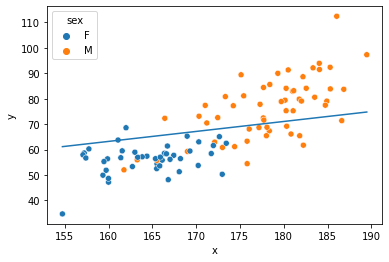

In [56]:
#https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e?gi=d6d7d34dbc77
w1 = np.random.randn(1)
b = np.random.randn(1)
lr = 0.00001 #find experemently (with values more than that const we not found minimal of error function)
n_epoch = 1000
w_hist = []
b_hist = []
height_train = points["height"]
weight_train = points["weight"]
for epoch in range(n_epoch):
  w_hist.append(w1)
  b_hist.append(b)
  weight_res = w1 * height_train + b
  error = weight_train - weight_res
  errors.append(error.mean())
  grad_w1 = -2 * (height_train * error).mean()
  grad_b = -2 * error.mean()
  w1 = w1 - lr * grad_w1
  b = b - lr * grad_b
  w_hist.append(w1)
  b_hist.append(b)
result = {"x":height_train,"y":w1 * height_train + b}
resultLine = pd.DataFrame(result)
sns.lineplot(data=resultLine, x="x", y="y")
sns.scatterplot(x='height', y='weight', hue='sex', data=points)

In [78]:
def gradient(hTrain, wTrain,w,b):
  error = 0.0
  error = (wTrain - (w*hTrain + b))**2
  return error.mean()
print(w_hist)


[array([0.52423362]), array([0.44518282]), array([0.44518282]), array([0.41322908]), array([0.41322908]), array([0.40031282]), array([0.40031282]), array([0.39509186]), array([0.39509186]), array([0.39298148]), array([0.39298148]), array([0.39212845]), array([0.39212845]), array([0.39178366]), array([0.39178366]), array([0.39164432]), array([0.39164432]), array([0.39158803]), array([0.39158803]), array([0.3915653]), array([0.3915653]), array([0.39155613]), array([0.39155613]), array([0.39155246]), array([0.39155246]), array([0.391551]), array([0.391551]), array([0.39155043]), array([0.39155043]), array([0.39155023]), array([0.39155023]), array([0.39155018]), array([0.39155018]), array([0.39155018]), array([0.39155018]), array([0.39155021]), array([0.39155021]), array([0.39155025]), array([0.39155025]), array([0.39155029]), array([0.39155029]), array([0.39155033]), array([0.39155033]), array([0.39155038]), array([0.39155038]), array([0.39155042]), array([0.39155042]), array([0.39155047]

In [89]:
w1,b = np.mgrid[-0.2:1:200j,-0.2:1:200j]

mse_vals  = np.zeros(shape = (200,200))
for i in range(-100,100,1):
    for j in range(-100,100,1):
        mse_vals[i,j] = gradient(height_train, weight_train, i, j)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


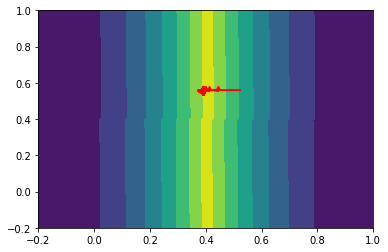

In [111]:
plt.contourf(w1, b, mse_vals)
ax = plt.axes()
for i in range(len(w_hist)-1):
  ax.arrow(w_hist[i][0], b_hist[i][0],w_hist[i+1][0] - w_hist[i][0], b_hist[i+1][0] - b_hist[i][0], color='RED',width=0.005)